# ripe or rotten mango?

In this section, we reload modules for immediate code updates and append a directory to the system path to simplify module imports.

In [2]:
import sys

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # If in Colab, clone the repo and install dependencies
    print("Running in Google Colab...")
    !git -C mangifera pull || git clone https://github.com/dejesusbg/mangifera.git
    %pip install -q -r mangifera/requirements.txt
    sys.path.append('./mangifera/')
    from mangifera.src import get_dataset, preprocess, graphic
else:
    # If running locally (within the repo), set up paths and install dependencies
    print("Running locally...")
    %reload_ext autoreload
    %autoreload 2
    %pip install -q -r ../requirements.txt
    sys.path.append('../')  
    from src import get_dataset, preprocess, graphic

Running locally...
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.4, 1

This section imports essential libraries for data manipulation and visualization, while also including custom modules for dataset management and image processing.

In [4]:
import warnings
import pandas as pd 
import matplotlib.pyplot as plt
from random import sample

warnings.filterwarnings("ignore")
%matplotlib inline

In this section, we initialize the dataset, create a DataFrame named `image_df` from the training data, and display its shape and the first five entries for better organization and analysis.

In [5]:
dataset = get_dataset()
train_set = dataset.train_data

train_df = pd.DataFrame(train_set)
print(train_df.shape)
train_df.head(5)

Loaded dataset ../data/raw\train.csv in 0.04 seconds.
Loaded dataset ../data/raw\validation.csv in 0.01 seconds.
(1989, 2)


,filename,label
0,1.jpg,Ripe
1,10.jpg,Ripe
2,1000.jpg,Ripe
3,102.jpg,Ripe
4,103.jpg,Ripe


We create an instance of `preprocess` with the training dataset, enabling efficient handling of image preprocessing tasks.

In [37]:
processor = preprocess(train_set)
features_set = processor.data

Loaded dataset ../data/processed\features.csv in 0.18 seconds.


After initializing the processor and obtaining the processed images, we organize these images into a DataFrame called `features_df`, which contain the relevant features for subsequent analysis and modeling, along with a color histogram for further insights.

In [38]:
features_df = pd.DataFrame(features_set)
print(features_df.shape)
features_df.describe()

(1989, 263)


,area,mean_r,mean_g,mean_b,std_dev_r,std_dev_g,std_dev_b,hist_0,hist_1,hist_2,...,hist_246,hist_247,hist_248,hist_249,hist_250,hist_251,hist_252,hist_253,hist_254,hist_255
count,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,6.685059e+04,181.854046,155.196007,126.786020,26.639887,27.660354,36.437425,0.134238,0.245349,0.295626,...,24.937657,29.984917,29.109603,32.245852,37.878331,66.667672,65.017597,106.477124,300.636501,791.275515
std,8.864969e+04,34.294345,38.557030,45.728988,10.555681,10.600771,17.150335,2.321837,3.487710,4.446314,...,173.964051,242.337250,130.992654,165.958609,135.860471,513.428973,375.608281,533.089099,1468.962687,4275.128394
min,1.083000e+03,76.756836,67.474856,14.339593,3.827603,5.637942,7.884951,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.530400e+04,153.235232,130.185822,92.556163,18.003269,20.049799,22.960395,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.800500e+04,177.447050,150.294597,128.293459,26.102443,25.818547,34.824957,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.991000e+04,205.149231,177.272506,150.121064,32.858022,32.503474,45.783679,0.000000,0.000000,0.000000,...,6.000000,6.000000,7.000000,7.000000,6.000000,8.000000,7.000000,6.000000,6.000000,0.000000
max,1.272680e+06,254.209087,253.923098,252.875468,76.380757,104.556292,116.152947,87.000000,136.000000,180.000000,...,4717.000000,7095.000000,3021.000000,5925.000000,2076.000000,16293.000000,14035.000000,14727.000000,36932.000000,39640.000000


The `show_samples` function visualizes a selection of images from the training dataset, displaying the original grayscale images. It also generates histograms for the images, providing insights into color intensity distributions. This function helps evaluate the training data and features detection outcomes effectively.

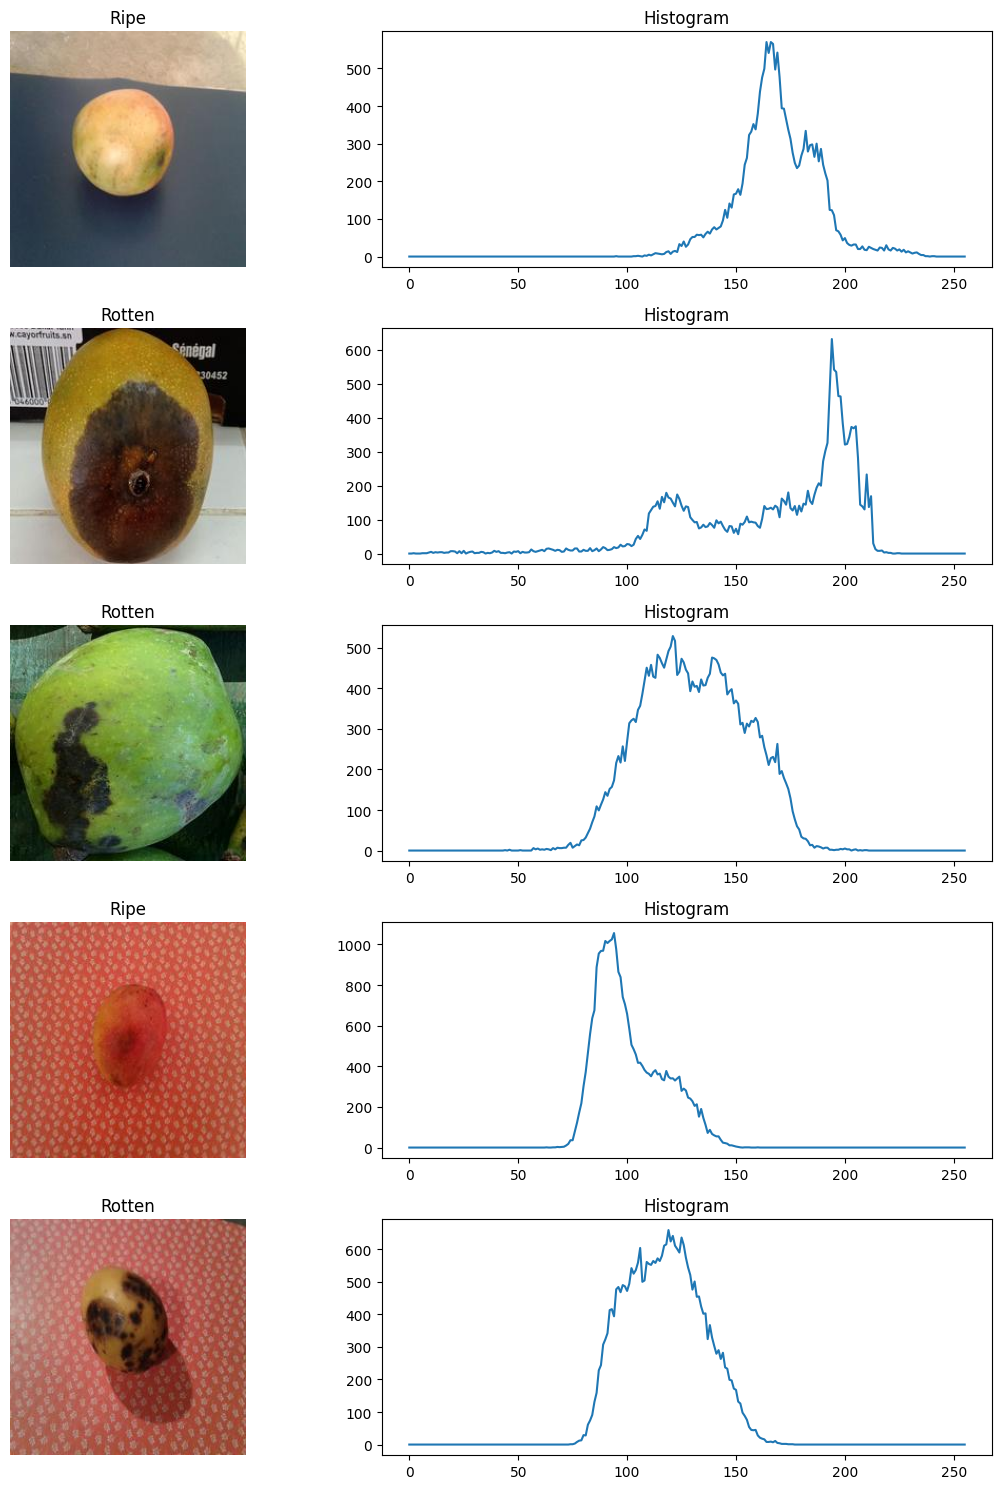

In [34]:
def show_samples(train_set, features_set, num_samples=5):
    num_samples = min(num_samples, len(train_set))

    indices = sample(range(len(train_set)), num_samples)
    selected_images = [(train_set[i], features_set[i]) for i in indices]

    _, axes = plt.subplots(num_samples, 2, figsize=(12, 3 * num_samples))

    for ax, (train_img, features_img) in zip(axes[:, 0], selected_images):
        ax.set_title(train_img["label"])
        ax.imshow(graphic.load_image("train", train_img))
        ax.axis("off")

    for ax, (train_img, features_img) in zip(axes[:, 1], selected_images):
        ax.set_title("Histogram")
        bins, histogram = graphic.load_histogram(features_img)
        ax.plot(bins, histogram)
        ax.axis("tight")

    plt.tight_layout()
    plt.show()


show_samples(train_set, features_set)